## Session #3 Homework

### Dataset

In this homework, we will use the California Housing Prices data from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able link:

In [35]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-09-26 14:45:51--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  7.35MB/s    in 0.2s    

2022-09-26 14:45:52 (7.35 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`
* `'ocean_proximity'`

In [37]:
df = pd.read_csv('./housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Data preparation

* Select only the features from above and fill in the missing values with 0.
* Create a new column `rooms_per_household` by dividing the column `total_rooms` by the column `households` from dataframe. 
* Create a new column `bedrooms_per_room` by dividing the column `total_bedrooms` by the column `total_rooms` from dataframe. 
* Create a new column `population_per_household` by dividing the column `population` by the column `households` from dataframe. 

In [38]:
df = df.fillna(0)
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
housing_median_age,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
total_rooms,20640.0,2635.763081,2181.615252,2.000000,1447.750000,2127.000000,3148.000000,39320.000000
total_bedrooms,20640.0,532.476211,422.678333,0.000000,292.000000,431.000000,643.250000,6445.000000
population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
households,20640.0,499.539680,382.329753,1.000000,280.000000,409.000000,605.000000,6082.000000
median_income,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
median_house_value,20640.0,206855.816909,115395.615874,14999.000000,119600.000000,179700.000000,264725.000000,500001.000000
rooms_per_household,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091


### Question 1

What is the most frequent observation (mode) for the column `ocean_proximity`?

Options:
* `NEAR BAY`
* `<1H OCEAN`
* `INLAND`
* `NEAR OCEAN`

In [40]:
df['ocean_proximity'].value_counts(dropna=False)

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Question 2

* Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your train dataset.
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

Options:
* `total_bedrooms` and `households`
* `total_bedrooms` and `total_rooms`
* `population` and `households`
* `population_per_household` and `total_rooms`

In [41]:
df.corr()
# total_bedrooms and households

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.068082,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.084836,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.065318,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.104112,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.317063,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.125396,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.920196,0.857126,0.918484,0.198050,0.134153,0.133798,-0.174583,-0.024581
total_bedrooms,0.068082,-0.065318,-0.317063,0.920196,1.000000,0.866266,0.966507,-0.007295,0.049148,0.002717,0.122205,-0.028019
population,0.099773,-0.108785,-0.296244,0.857126,0.866266,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.031397,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.966507,0.907222,1.000000,0.013033,0.065843,-0.080598,0.059818,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007295,0.004834,0.013033,1.000000,0.688075,0.326895,-0.573836,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049148,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.238759,-0.023737
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.002717,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.387465,-0.004852


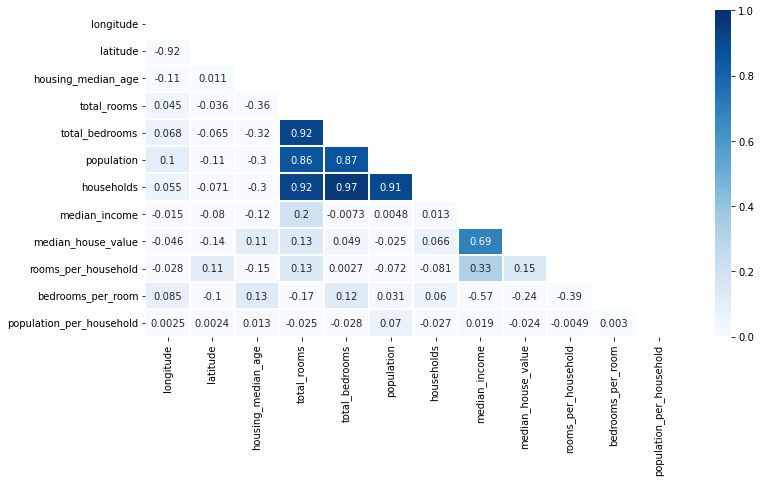

In [42]:
corr = df.corr()
# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax1 = plt.subplots(figsize=(12,6))
ax1 = sns.heatmap(df.corr(), cbar=True, linewidths=2,vmax=1, vmin=0, square=False, cmap='Blues', annot=True, fmt=".2g", mask=mask)
# ax = sns.heatmap(df.corr())
plt.show()

### Make `median_house_value` binary

* We need to turn the `median_house_value` variable from numeric into binary.
* Let's create a variable `above_average` which is `1` if the `median_house_value` is above its mean value and `0` otherwise.

MEAN VALUE ('median_house_value'): 206855.82


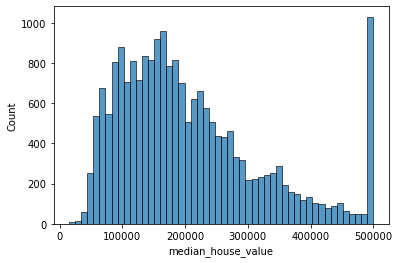

In [43]:
sns.histplot(df['median_house_value'], bins=50);
print(f"MEAN VALUE ('median_house_value'): {round(df['median_house_value'].mean(),2)}")

In [44]:
df['above_average'] = (df['median_house_value'] > df['median_house_value'].mean()).astype(int)
df['above_average'].value_counts()
# sns.barplot(df['above_average'].value_counts());

0    12255
1     8385
Name: above_average, dtype: int64

### Split the data

* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.
* Make sure that the target value (`median_house_value`) is not in your dataframe.


In [45]:
df = df.drop(columns=['median_house_value'])

In [46]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

y_train = df_train['above_average']
y_val = df_val['above_average']
y_test = df_test['above_average']
df_train = df_train.drop(columns=['above_average'])
df_val = df_val.drop(columns=['above_average'])
df_test = df_test.drop(columns=['above_average'])
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17244,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.754011
8817,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,2.789082
19686,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,2.540059
3545,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,2.059016
17019,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,2.516456


### Question 3

* Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
* What is the value of mutual information?
* Round it to 2 decimal digits using `round(score, 2)`

Options:
- 0.26
- 0
- 0.10
- 0.16

In [47]:
from sklearn.metrics import mutual_info_score

In [48]:
# Define categoriacal and numerical variables
categorical = ['ocean_proximity']
numerical = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']

# Number of categories per categorical variable (only one)
df_train_full[categorical].nunique()

ocean_proximity    5
dtype: int64

In [49]:
def calculate_mi(series):        
    return mutual_info_score(series, df_train_full['above_average'])

df_mi = df_train_full[categorical].apply(calculate_mi)   
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')   
df_mi.round(2)

,MI
ocean_proximity,0.1


### Question 4

* Now let's train a logistic regression
* Remember that we have one categorical variable `ocean_proximity` in the data. Include it using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Options:
- 0.60
- 0.72
- 0.84
- 0.95

### One-hot encoding

In [50]:
from sklearn.feature_extraction import DictVectorizer

In [51]:
train_dict = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)
dv.get_feature_names_out().tolist()


['bedrooms_per_room',
 'households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'population_per_household',
 'rooms_per_household',
 'total_bedrooms',
 'total_rooms']

In [52]:
df_train.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17244,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.92246,0.259714,3.754011


In [53]:
X_train[0]

array([ 2.59713701e-01,  3.74000000e+02,  3.90000000e+01,  3.44300000e+01,
       -1.19670000e+02,  2.36810000e+00,  1.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.40400000e+03,
        3.75401070e+00,  3.92245989e+00,  3.81000000e+02,  1.46700000e+03])

### Training logistic regression

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [56]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [57]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.07847128, 0.16795741, 0.95304104, ..., 0.96103024, 0.85404741,
       0.46588232])

In [58]:
above_average = y_pred > 0.5
acc = (y_val == above_average).mean()
print(round(acc, 3))

0.836


### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 
* Which of following feature has the smallest difference? 
   * `total_rooms`
   * `total_bedrooms` 
   * `population`
   * `households`

> **note**: the difference doesn't have to be positive


In [59]:
original_acc = acc
all_features = df_train.columns.tolist()

drop_feature = 'total_rooms'
drop_feature = 'total_bedrooms'
drop_feature = 'population'
drop_feature = 'households'
drop_feature = ''

features_to_drop = ['None', 'total_rooms', 'total_bedrooms', 'population', 'households']
for drop_feature in features_to_drop:
    selected_features = [item for item in all_features if item not in drop_feature]
    # print(selected_features)
    df_train_dropped = df_train[selected_features]
    df_val_dropped = df_val[selected_features]
    
    # One hot encoding
    train_dict = df_train_dropped.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)
    X_train = dv.transform(train_dict)
    # dv.get_feature_names_out().tolist()

    # Training logistic regression
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    # One hot encoding validation set
    val_dict = df_val_dropped.to_dict(orient='records')
    X_val = dv.transform(val_dict)
    y_val_pred = model.predict_proba(X_val)[:, 1]
    above_average = y_val_pred > 0.5
    accuracy = (y_val == above_average).mean()
    print(f" * {drop_feature}: {accuracy - original_acc}")

 * None: 0.0
 * total_rooms: 0.002664728682170603
 * total_bedrooms: 0.00024224806201555982
 * population: -0.009205426356589164
 * households: -0.0021802325581394832


### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column `'median_house_value'`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model (`model = Ridge(alpha=a, solver="sag", random_state=42)`) on the training data.
* This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest `alpha`.

Options:
- 0
- 0.01
- 0.1
- 1
- 10

In [60]:
# Read Csv
df = pd.read_csv('./housing.csv')

# Preprocessing
df = df.fillna(0)
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

y_train = np.log1p(df_train['median_house_value'])
y_val = np.log1p(df_val['median_house_value'])
y_test = np.log1p(df_test['median_house_value'])
df_train = df_train.drop(columns=['median_house_value'])
df_val = df_val.drop(columns=['median_house_value'])
df_test = df_test.drop(columns=['median_house_value'])
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17244,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.754011
8817,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,2.789082
19686,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,INLAND,3.908012,0.234624,2.540059
3545,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1H OCEAN,5.201093,0.194158,2.059016
17019,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,NEAR OCEAN,7.010127,0.139762,2.516456


In [61]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [62]:
alpha_list = [0, 0.01, 0.1, 1, 10]
for a in alpha_list:    
    
    # One hot encoding
    train_dict = df_train.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)
    X_train = dv.transform(train_dict)
    # dv.get_feature_names_out().tolist()

    # Training linear regression    
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    
    # One hot encoding validation set
    val_dict = df_val.to_dict(orient='records')
    X_val = dv.transform(val_dict)
    y_val_pred = model.predict(X_val)
    lin_mse = mean_squared_error(y_val, y_val_pred)
    lin_rmse = np.sqrt(lin_mse)  
    print(f" * {a}: {lin_rmse}")

 * 0: 0.524063570701514
 * 0.01: 0.524063570718629
 * 0.1: 0.5240635708812071
 * 1: 0.5240635725155536
 * 10: 0.5240635888333284
